In [ ]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import os
import mne
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import tensorflow
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.layers import Dense, Activation, Conv1D, MaxPooling1D, GlobalAveragePooling1D, Flatten, Dropout, BatchNormalization, Input,UpSampling1D
from tensorflow.keras.layers import concatenate, Lambda, Conv2D, MaxPooling2D, GlobalAveragePooling2D,LSTM
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# set directory
parent_dir = os.path.dirname(os.getcwd())

fo = os.path.join(parent_dir, 'data', 'Envisioned_Speech_Recognition', 'Char')
os.chdir(parent_dir)
print("Updated Working Directory:", os.getcwd())

In [ ]:
from __00_load_edf import load_alphabet
from __01_transform_data import transform_eeg_data_MA, process_band
from __02_model import train, visualize
from __03_utils import plot_eeg

In [ ]:
X, Y, channels = load_alphabet(fo)
print(f'shape of X : {X.shape}')
print(f'shape of Y : {Y.shape}')
print(channels)
plot_eeg(X, 4)

180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.1473 - loss: 2.2373
Epoch 18: val_loss did not improve from 2.22874
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 0.1472 - loss: 2.2373 - val_accuracy: 0.1364 - val_loss: 2.2413
Epoch 19/500
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.1499 - loss: 2.2346
Epoch 19: val_loss did not improve from 2.22874
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - accuracy: 0.1499 - loss: 2.2346 - val_accuracy: 0.1404 - val_loss: 2.2486
Epoch 20/500
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.1443 - loss: 2.2398
Epoch 20: val_loss did not improve from 2.22874
181/181 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.1444 - loss: 2.2398 - val_accuracy: 0.1475 - val_loss: 2.2808
Epoch 21/500
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.1428 - loss: 2.2389
Epoch 21: val_loss did not improve from 2.22874
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - accuracy: 0.1428 - loss: 2.2388 - val_accuracy: 0.1393 - val_lo

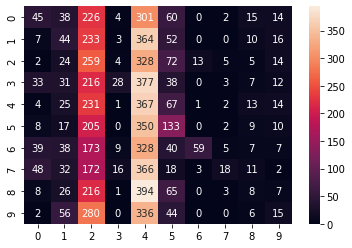

226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


c:\Users\ryoii\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\ryoii\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


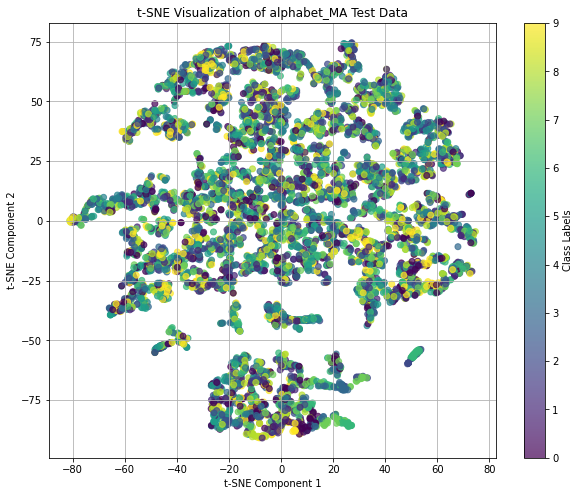

In [5]:
#  Moving Average filter
selected_channels = [4,9]
dataset_type = 'alphabet_MA'
channels  = 'two_channel'
X_new, Y_new = transform_eeg_data_MA(X, Y, selected_channels)

model = train(X_new, Y_new, selected_channels, dataset_type=dataset_type, epochs=500, channels=channels)
visualize(model, X_new, Y_new, selected_channels, dataset_type=dataset_type)

Epoch 1/500
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.1060 - loss: 2.5764
Epoch 1: val_loss improved from inf to 2.30711, saving model to model/two_channel/model_alphabet_MA_FullBand.keras
181/181 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - accuracy: 0.1061 - loss: 2.5750 - val_accuracy: 0.1047 - val_loss: 2.3071
Epoch 2/500
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.1169 - loss: 2.3185
Epoch 2: val_loss did not improve from 2.30711
181/181 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.1169 - loss: 2.3185 - val_accuracy: 0.1045 - val_loss: 2.3271
Epoch 3/500
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.1204 - loss: 2.2913
Epoch 3: val_loss did not improve from 2.30711
181/181 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.1204 - loss: 2.2913 - val_accuracy: 0.1073 - val_loss: 2.3144
Epoch 4/500
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.1190 - loss: 2.2862
Epoch 4: val_loss improved from 2.30711 to 2.29076, saving model to model/two_chan

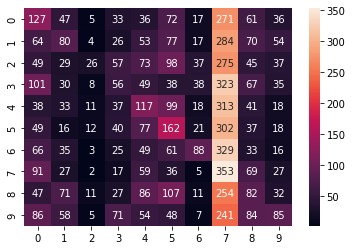

226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


c:\Users\ryoii\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\ryoii\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


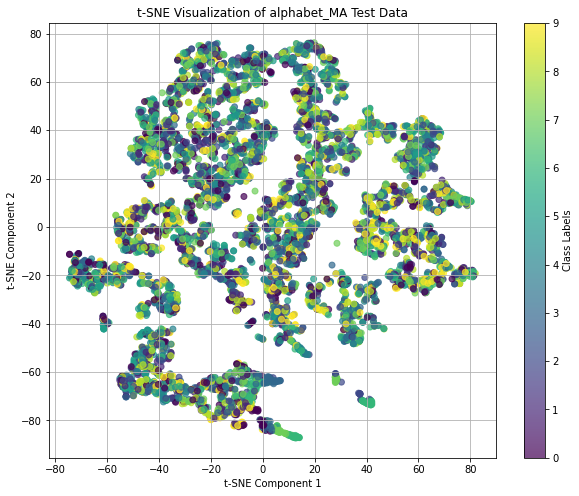

In [6]:
#  Butterworth filter
selected_channels = [4,9]
dataset_type = 'alphabet_MA'
channels  = 'two_channel'
X_new, Y_new = transform_eeg_data_MA(X, Y, selected_channels)

model = train(X_new, Y_new, selected_channels, dataset_type=dataset_type, epochs=500, channels=channels)
visualize(model, X_new, Y_new, selected_channels, dataset_type=dataset_type)